In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the dataset
data = pd.read_csv('mall_customers.csv', header=None,
                   names=['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'])

In [4]:
features = data[['Age', 'AnnualIncome', 'SpendingScore']]

In [5]:
# Convert non-numeric values to NaN and drop them
features = features.apply(pd.to_numeric, errors='coerce').dropna()

In [6]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

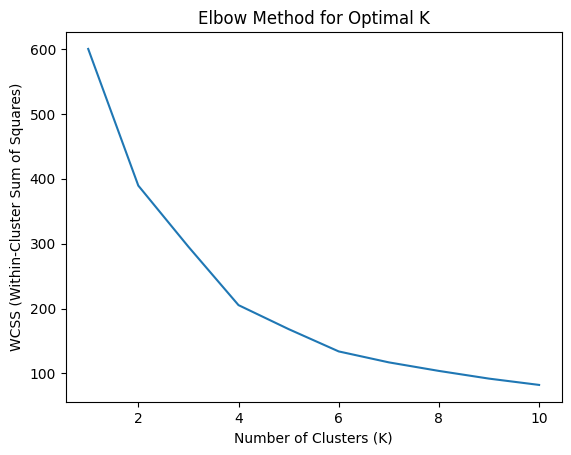

In [8]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [9]:
# Based on the Elbow Method, let's choose K=5
k = 5

In [10]:
# Apply K-means clustering with the chosen K
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)


In [11]:
# Assign cluster labels to the DataFrame
features['Cluster'] = cluster_labels


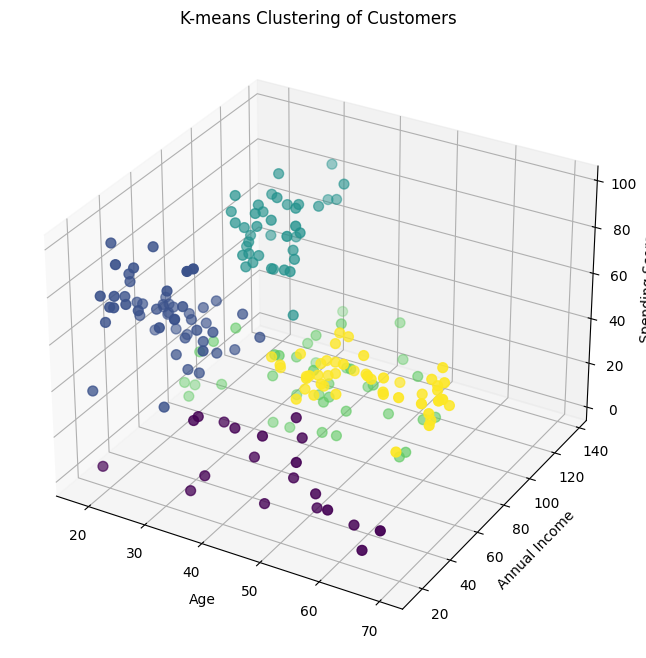

In [12]:
# Visualize the clusters in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features['Age'], features['AnnualIncome'], features['SpendingScore'], c=features['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('K-means Clustering of Customers')
plt.show()